In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_path = ("./yelp_labelled.txt")

yelp = pd.read_csv(data_path, delimiter="\t", header=None)

#Score is either 1 (for positive) or 0 (for negative)
yelp.columns = ["review", "score"]

In [35]:
yelp

,review,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [36]:
keywords = ["not" , "waste","didn't", "nasty", "angry", "never", "bad", "worst", "wasn't", "else", "should"]

for key in keywords:
    yelp[str(key)] = yelp.review.str.contains((" " + str(key) +" "), case = False)
    yelp[str(key)] = yelp.review.str.contains((str(key) +" "), case = False)
    yelp[str(key)] = yelp.review.str.contains((" " + str(key)), case = False)

In [37]:
yelp

,review,score,not,waste,didn't,nasty,angry,never,bad,worst,wasn't,else,should
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,True,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,True,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,False,False,False,False,False,False,False,False,False,False,True
996,Appetite instantly gone.,0,False,False,False,False,False,False,False,False,False,False,False
997,Overall I was not impressed and would not go b...,0,True,False,False,False,False,False,False,False,False,False,False
998,"The whole experience was underwhelming, and I ...",0,False,False,False,False,False,False,False,False,False,False,False


In [38]:
yelp["score"] = (yelp["score"] == 0)

yelp

,review,score,not,waste,didn't,nasty,angry,never,bad,worst,wasn't,else,should
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,True,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,True,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,True,False,False,False,False,False,False,False,False,False,False,True
996,Appetite instantly gone.,True,False,False,False,False,False,False,False,False,False,False,False
997,Overall I was not impressed and would not go b...,True,True,False,False,False,False,False,False,False,False,False,False
998,"The whole experience was underwhelming, and I ...",True,False,False,False,False,False,False,False,False,False,False,False


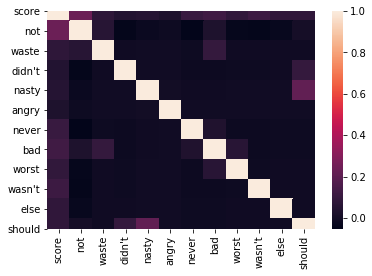

In [39]:
sns.heatmap(yelp.corr())

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are free:offer and cash:winner. For now, let's keep everything in the dataset.

In [40]:
data = yelp[keywords]
target = yelp["score"]

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

#initiate our model and store it in a new variable
bnb = BernoulliNB()

#fit our model to the data
bnb.fit(data, target)

#classify, storing the result in a new variable
y_pred = bnb.predict(data)

print("Number of mislabeled points out of total {} points : {}".format(data.shape[0],))